In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (8, 4.5)

dataset = pd.read_csv("https://raw.githubusercontent.com/DBottin/CLU/main/edlich-kmeans-A0.csv")
X = dataset["V1"]
Y = dataset["V2"]
Z = dataset["V3"]
dataset

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


Dataset grafisch anzeigen lassen:

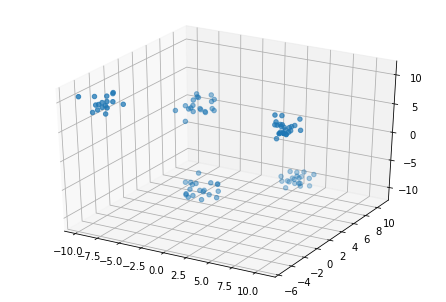

In [2]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z)

Aus dem Graph ist klar, dass k=5 das beste k ist.

Hier ist der Beweis (Elbow Effect):

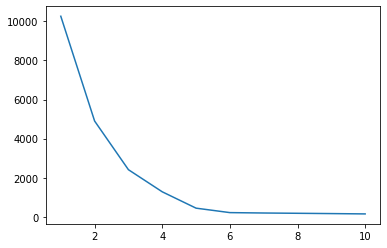

In [3]:
total_distance = []

for k in range(1, 11): #Für 1-10 Cluster probieren
    kmeans = KMeans(n_clusters=k) #Clusteranzahl im aktuellen Versuch festlegen
    kmeans = kmeans.fit(dataset)
    labels = kmeans.predict(dataset) #Jeden Punkt einem Cluster zuordnen
    C = kmeans.cluster_centers_ #Ideale Mittelpunkte finden
    curr_distance = 0
    
    for i in range(len(dataset)): #Für jeden Punkt im Dataset
      curr_center = C[labels[i]] #Mitte finden vom Cluster, zu der der Punkt gehört
      curr_distance += (dataset.loc[i].at["V1"] - curr_center[0]) ** 2 + (dataset.loc[i].at["V2"] - curr_center[1]) ** 2 + (dataset.loc[i].at["V3"] - curr_center[2]) ** 2 #Abstand zur Mitte berechnen
    
    total_distance.append(curr_distance) #Für jedes k den Gesamtabstand in einem array speichern
  
count = [1,2,3,4,5,6,7,8,9,10]
plt.plot(count, total_distance)

Nun, da wir wissen, dass k=5 ideal ist, können wir den Clustering Vector berechnen:

In [4]:
kmeans = KMeans(n_clusters=5) #Wir wissen, dass es 5 Cluster geben soll
kmeans = kmeans.fit(dataset)
labels = kmeans.predict(dataset) #Punkte den Clustern zuordnen
labels

array([3, 2, 2, 1, 2, 4, 1, 2, 0, 1, 2, 0, 1, 4, 3, 2, 0, 4, 3, 3, 2, 0,
       3, 2, 2, 1, 0, 0, 0, 4, 0, 0, 4, 4, 2, 3, 4, 3, 0, 2, 4, 4, 4, 3,
       4, 2, 1, 1, 4, 1, 1, 4, 0, 0, 1, 1, 3, 1, 2, 4, 1, 3, 1, 1, 4, 1,
       3, 3, 3, 4, 4, 1, 0, 1, 1, 0, 2, 4, 1, 0, 0, 4, 2, 3, 3, 2, 3, 3,
       3, 1, 0, 0, 0, 2, 1, 1, 0, 4, 3, 3], dtype=int32)

Zuletzt kann der Clustering Vector zu jedem Punkt im Dataset zugefügt werden:

In [5]:
dataset['Clustering_vector'] = labels
dataset

,V1,V2,V3,Clustering_vector
0,-5.340236,4.747246,3.823326,3
1,-9.587065,-3.434466,9.701839,2
2,-8.385012,-3.902794,8.514620,2
3,5.708226,2.658575,5.404482,1
4,-7.431665,-4.390251,9.003216,2
...,...,...,...,...
95,5.240474,2.983800,5.104915,1
96,-1.675543,3.780111,-8.060940,0
97,2.979751,10.772783,-10.093143,4
98,-5.154519,5.976515,2.794622,3
